In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten,Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv("D:\Deep Learning\Deep Learning - Datasets\MNIST\mnist_784_csv.csv")

In [21]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [22]:
y = df['class'].values
x = df.drop(labels=['class'],axis=1)

In [23]:
x.shape

(70000, 784)

In [24]:
y.shape

(70000,)

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
x_train.shape

(56000, 784)

In [27]:
y_train.shape

(56000,)

In [28]:
x_train = x_train/255
x_test = x_test/255

In [29]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)


In [30]:
x_train.shape

(56000, 28, 28, 1)

In [31]:
x_test.shape

(14000, 28, 28, 1)

In [32]:
model = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax'),
])

In [33]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
H = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1750/1750 [==============================] - 7s 3ms/step - loss: 0.7209 - accuracy: 0.7872
Epoch 2/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.2414 - accuracy: 0.9301
Epoch 3/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1781 - accuracy: 0.9474
Epoch 4/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.1414 - accuracy: 0.9586
Epoch 5/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.1185 - accuracy: 0.9655
Epoch 6/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.1005 - accuracy: 0.9701
Epoch 7/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.0869 - accuracy: 0.9744
Epoch 8/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.0763 - accuracy: 0.9776
Epoch 9/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.0665 - accuracy: 0.9802
Epoch 10/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.058

In [35]:
test_loss,test_acc = model.evaluate(x_test,y_test)

438/438 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9691


In [36]:
print("Losss : {}".format(test_loss))
print("Accuracy : {}".format(test_acc))

Losss : 0.09958846867084503
Accuracy : 0.9690714478492737


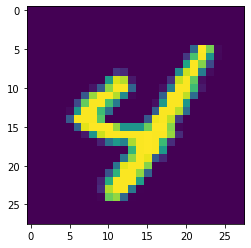

In [38]:
plt.imshow(x_train[0])

In [ ]:
import random 

n = random.randint(0,999)
predicted_value = model.predict(x_test)
output = np.argmax(predicted_value[n])
print("Predicted number is {}".)